In [97]:
import sys 
sys.setrecursionlimit(2000)

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

IDEE DE STRUCTURE - peut-être qu'on peut partir d'une pseudo problématique relativement large pour nous permettre de faire le plus d'analyses possibles. En soit je pense que c'est ça le but de l'exo: understand the database and how it can be useful. 

“How can the European bank identify and predict key factors driving customer churn, and what strategies can be implemented to reduce churn based on customer profiles and behavior patterns?” - Ca peut être suffisamment large mais ça monterai qu'on réfléchit à l'utilité de ces données et ça justifie toute la partie statistic descriptive qu'on fait au début. 

Broken down into several key components (qui peuvent potentiellement faire office de grosses parties):


1.	Customer Profil (un peu ce que tu fais à la fin de ton code):
	How can we segment the customer - Are certain customer profiles (age, salary level, gender, geography, tenure, credit score...) more likely to churn?
    [ici intégrer descriptive analysis + surtout look at the distribution of variables accross groups]
2.	Behavioral Patterns:
	What transactional behaviors or usage patterns (number of products, having a credit card) correlate with a higher risk of churn? [ici peut être une correlation matrix ? c'est visuellement stylé mais je sais pas si on a assez de variables, à voir: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e] Is there a point where customers show warning signs before leaving? [ça je trouve ça plus intéressant, genre ok est-ce qu'on peut prédire que certains customers vont partir soon au vu des autres patterns de ceux dejà partis - ce qui est donc lié à la partie Machine Learning qu'on doit ajouter juste après]
	QUESTION DU PROF TO DO TOO HERE: How do the different variables affect churn? What are the causes that can lead to increased (or reduced) customer churn?
3.	Predictive Modeling:
	Predictive classification model using machine learning to accurately identify customers who are most likely to churn based on their data history? Which features are most important in predicting churn? - [KNN, Decision trees tout ça I guess]

C'est une première idée de structure, chaque élement pouvant être une sous partie où analyse bien nos résulats.

LOADING THE DATA

In [98]:
df_full = pd.read_csv("churn_bank.csv") #if already in the repo, otherwise use the full path

PARTIE 2 
QUESTIONS DU PROF PERTINENTES POUR CETTE PARTIE (aller plus loin que ça)

What is the churn rate among the bank's customers?
How do the different variables affect churn? What are the causes that can lead to increased (or reduced) customer churn?

In [99]:
# getting total number of customers
tot_customer = df_full["CustomerId"].nunique()
nbr_churned = df_full.loc[df_full["Exited"]==1, "CustomerId"].count()

churn_rate = (nbr_churned/tot_customer)*100
print(churn_rate) # around 20%

20.369999999999997


POSSIBLE CORRELATIONS

[Text(0.5, 1.0, 'Overview: Correlation matrix')]

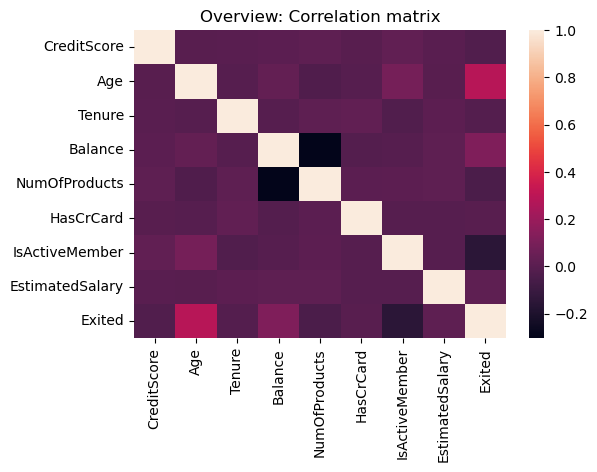

In [100]:
# Global view. Let's build a correlation matrix to get a first idea of what might affect churn
# trying it without geography, surname and gender variable - strings + customerID
df_num = df_full.drop(columns=["Geography", "Gender", "Surname", "CustomerId"])
# computing it
matrix_corr = df_num.corr()
# plotting
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(matrix_corr)
# title and axis labels
ax.set(
    title="Overview: Correlation matrix"
)

#sav the figs for after - plt.savefig('CorrelationMatrix_1.png')

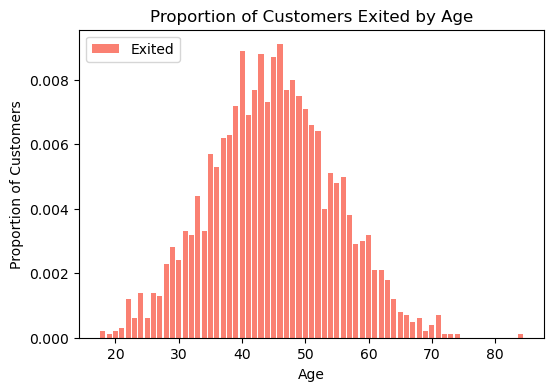

[Text(0.5, 1.0, 'Age distribution'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Frequency')]

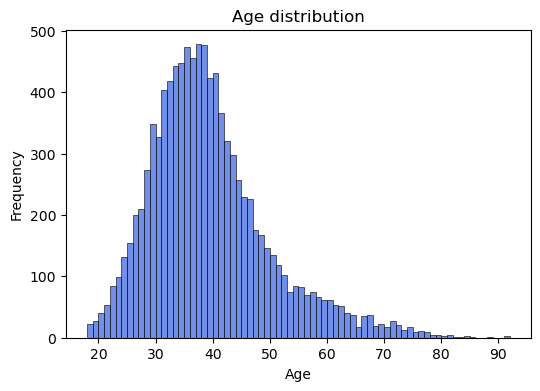

In [101]:
# Looking at the age influence
NRows = df_full.shape[0]
Age_exited = df_full.groupby(['Age', 'Exited']).size().unstack().div(NRows)

fig, ax = plt.subplots(figsize=(6, 4))

# Plot for Exited == 1 (exited) - Stacked on top
ax.bar(Age_exited.index,
       Age_exited[1],
       label='Exited', color='salmon'
       )

ax.set_xlabel('Age')
ax.set_ylabel('Proportion of Customers')
ax.set_title('Proportion of Customers Exited by Age')
ax.legend()

plt.show()
# OK mais en proportion ?

################

# distribution of Age overall
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    df_full,
    binwidth=1, # 1 year bins (sinon ça fait l'historgramme comprend que c'est des intervalles d'ages et donc il va cumuler plusieurs valeurs. 
    # setting it at 1 fait qu'il prends one value for each age)
    x='Age',
    color='royalblue',
    edgecolor='black')

# We set plot title and axis labels
ax.set(
    title="Age distribution",
    xlabel="Age",
    ylabel="Frequency")


# QUICK CHECK 
# age_39 = df_full.loc[df_full["Age"]== 39]


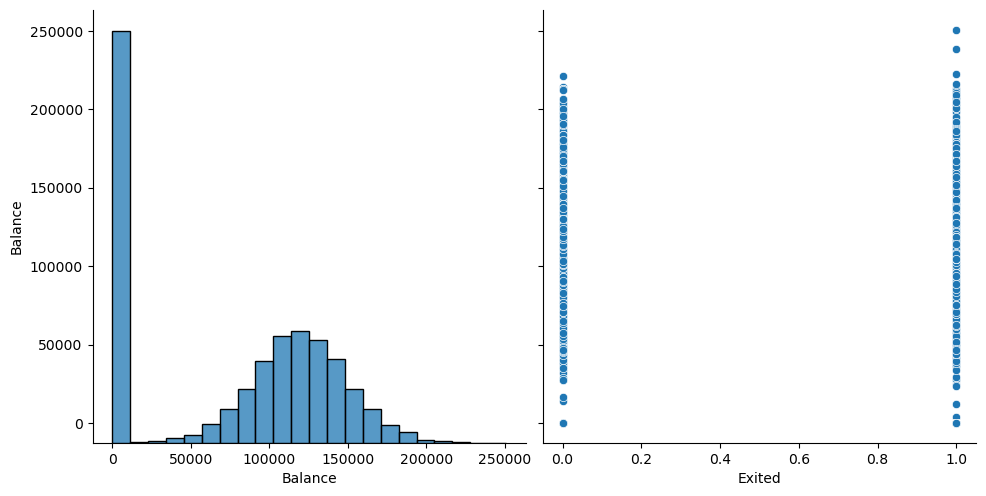

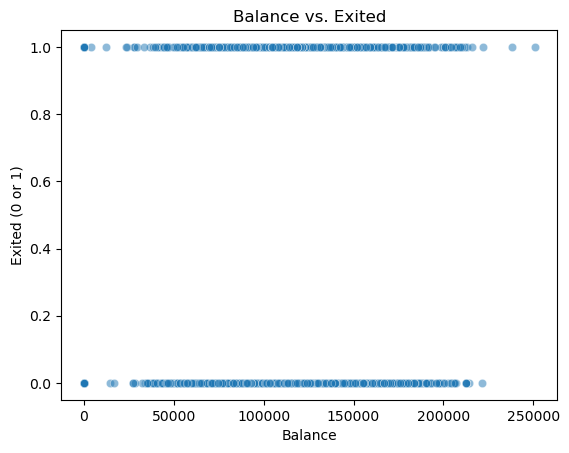

In [106]:
# Let's check the balance influence 

sns.pairplot(df_full, 
             x_vars=['Balance', 'Exited'], 
             y_vars='Balance', height=5) 
plt.show()  # pas ouf comme visu 

##### 
sns.scatterplot(df_full, 
             x='Balance', 
             y='Exited', 
             alpha=0.5) 
plt.xlabel('Balance') 
plt.ylabel('Exited (0 or 1)') 
plt.title('Balance vs. Exited') 
plt.show()


In [107]:
# test d'une map de l'Europe pour visu des zones geographiques (pas important y a que 3 pays mais ok) - could use geopandas si ok pour l'installer